# Data Analysis Headphone study

In this notebook we will do some data analysis on data acquired at KD2Lab.\
Let's start by importing the relevant tooling and loading the data

___
## Data preprocessing and overview
First we need to get a feeling for the data and see what we're working with.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter, defaultdict
import re
import json
from datetime import datetime


In [2]:
df = pd.read_csv('all_apps_wide-2025-03-06.csv')

In [3]:
df.head()

,participant.id_in_session,participant.code,participant.label,participant._is_bot,participant._index_in_pages,participant._max_page_index,participant._current_app_name,participant._current_page_name,participant.time_started_utc,participant.visited,...,headphones_finish_3.1.subsession.round_number,debriefing_3.1.player.id_in_group,debriefing_3.1.player.role,debriefing_3.1.player.payoff,debriefing_3.1.player.mathsRating,debriefing_3.1.player.clickRating,debriefing_3.1.player.mathSkill,debriefing_3.1.player.clickSkill,debriefing_3.1.group.id_in_subsession,debriefing_3.1.subsession.round_number
0,1,8gp06sxa,NaN,0,370,371,debriefing_3,Debriefing,2025-03-06 14:50:25.669358,1,...,1,1,NaN,0.0,NaN,NaN,NaN,NaN,1,1
1,2,sswre0ps,NaN,0,371,371,debriefing_3,ThankYou,2025-03-06 14:51:12.130240,1,...,1,2,NaN,0.0,7.0,7.0,2.0,3.0,1,1
2,3,ga0lmmg0,NaN,0,371,371,debriefing_3,ThankYou,2025-03-06 14:51:30.677287,1,...,1,3,NaN,0.0,3.0,2.0,4.0,4.0,1,1
3,4,uzvf1ov2,NaN,0,370,371,debriefing_3,Debriefing,2025-03-06 16:07:49.459604,1,...,1,4,NaN,0.0,NaN,NaN,NaN,NaN,1,1
4,5,ni3ulblj,NaN,0,370,371,debriefing_3,Debriefing,2025-03-06 16:07:49.473199,1,...,1,5,NaN,0.0,NaN,NaN,NaN,NaN,1,1


In [4]:
print(df.keys)

<bound method NDFrame.keys of    participant.id_in_session participant.code  participant.label  \
0                          1         8gp06sxa                NaN   
1                          2         sswre0ps                NaN   
2                          3         ga0lmmg0                NaN   
3                          4         uzvf1ov2                NaN   
4                          5         ni3ulblj                NaN   

   participant._is_bot  participant._index_in_pages  \
0                    0                          370   
1                    0                          371   
2                    0                          371   
3                    0                          370   
4                    0                          370   

   participant._max_page_index participant._current_app_name  \
0                          371                  debriefing_3   
1                          371                  debriefing_3   
2                          371        

In [5]:
df.shape

(5, 1513)

In [ ]:
print(df.describe())

       participant.id_in_session  participant.label  participant._is_bot  \
count                   5.000000                0.0                  5.0   
mean                    3.000000                NaN                  0.0   
std                     1.581139                NaN                  0.0   
min                     1.000000                NaN                  0.0   
25%                     2.000000                NaN                  0.0   
50%                     3.000000                NaN                  0.0   
75%                     4.000000                NaN                  0.0   
max                     5.000000                NaN                  0.0   

       participant._index_in_pages  participant._max_page_index  \
count                     5.000000                          5.0   
mean                    370.400000                        371.0   
std                       0.547723                          0.0   
min                     370.000000             

# Cleaning the data
### okay, now that we've seen that there is a lot of data for each of the 5 players. 

However, in the df.head we can see that player 2 and 3 seem to have more responses in some questions.\
We will have to check if this is only in some questions or if we might have to focus only on these participants.\
Let's start out by getting rid of all the columns filled with purely NaNs and see what those columns are. 



In [7]:
df_all_nan = df.loc[:, df.isna().all()]
df_clean = df.loc[:, ~df.isna().all()]


In [8]:
print(df_all_nan.shape)
print(df_clean.shape)


(5, 721)
(5, 792)


In [9]:
print(df_all_nan.keys())

Index(['participant.label', 'participant.mturk_worker_id',
       'participant.mturk_assignment_id', 'participant.puzzle_levels',
       'participant.puzzle_imgs', 'participant.puzzle_imgs_medium',
       'participant.puzzle_imgs_easy', 'participant.puzzle_rounds',
       'participant.puzzle_difficulty_selection', 'participant.math_levels',
       ...
       'headphones_finish_3.1.player.maia30',
       'headphones_finish_3.1.player.maia31',
       'headphones_finish_3.1.player.maia32',
       'headphones_finish_3.1.player.maia33',
       'headphones_finish_3.1.player.maia34',
       'headphones_finish_3.1.player.maia35',
       'headphones_finish_3.1.player.maia36',
       'headphones_finish_3.1.player.maia37',
       'headphones_finish_3.1.player.maia38c', 'debriefing_3.1.player.role'],
      dtype='object', length=721)


In [10]:
df_clean.head()

,participant.id_in_session,participant.code,participant._is_bot,participant._index_in_pages,participant._max_page_index,participant._current_app_name,participant._current_page_name,participant.time_started_utc,participant.visited,participant.payoff,...,headphones_finish_3.1.group.id_in_subsession,headphones_finish_3.1.subsession.round_number,debriefing_3.1.player.id_in_group,debriefing_3.1.player.payoff,debriefing_3.1.player.mathsRating,debriefing_3.1.player.clickRating,debriefing_3.1.player.mathSkill,debriefing_3.1.player.clickSkill,debriefing_3.1.group.id_in_subsession,debriefing_3.1.subsession.round_number
0,1,8gp06sxa,0,370,371,debriefing_3,Debriefing,2025-03-06 14:50:25.669358,1,0.0,...,1,1,1,0.0,NaN,NaN,NaN,NaN,1,1
1,2,sswre0ps,0,371,371,debriefing_3,ThankYou,2025-03-06 14:51:12.130240,1,0.0,...,1,1,2,0.0,7.0,7.0,2.0,3.0,1,1
2,3,ga0lmmg0,0,371,371,debriefing_3,ThankYou,2025-03-06 14:51:30.677287,1,0.0,...,1,1,3,0.0,3.0,2.0,4.0,4.0,1,1
3,4,uzvf1ov2,0,370,371,debriefing_3,Debriefing,2025-03-06 16:07:49.459604,1,0.0,...,1,1,4,0.0,NaN,NaN,NaN,NaN,1,1
4,5,ni3ulblj,0,370,371,debriefing_3,Debriefing,2025-03-06 16:07:49.473199,1,0.0,...,1,1,5,0.0,NaN,NaN,NaN,NaN,1,1


### Deleting the "Ghost Players"

It seems like player 0,3 and 4 are not real players or are lacking too much information.\
Therefore we will delete these empty rows

In [11]:
df_clean.drop(index= [0,3,4], inplace= True)

/var/folders/ml/fyq5x5t55wx4129dn03n32hm0000gn/T/ipykernel_44285/3581122541.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean.drop(index= [0,3,4], inplace= True)


In [12]:
df_clean.head()

,participant.id_in_session,participant.code,participant._is_bot,participant._index_in_pages,participant._max_page_index,participant._current_app_name,participant._current_page_name,participant.time_started_utc,participant.visited,participant.payoff,...,headphones_finish_3.1.group.id_in_subsession,headphones_finish_3.1.subsession.round_number,debriefing_3.1.player.id_in_group,debriefing_3.1.player.payoff,debriefing_3.1.player.mathsRating,debriefing_3.1.player.clickRating,debriefing_3.1.player.mathSkill,debriefing_3.1.player.clickSkill,debriefing_3.1.group.id_in_subsession,debriefing_3.1.subsession.round_number
1,2,sswre0ps,0,371,371,debriefing_3,ThankYou,2025-03-06 14:51:12.130240,1,0.0,...,1,1,2,0.0,7.0,7.0,2.0,3.0,1,1
2,3,ga0lmmg0,0,371,371,debriefing_3,ThankYou,2025-03-06 14:51:30.677287,1,0.0,...,1,1,3,0.0,3.0,2.0,4.0,4.0,1,1


### Let's try to find the columns which contain data regarding the "whack-a-mole"-task
In the csv file the math task is referrenced as "mathTask", while the whack-a-mole task is labelled "clickTask"

In [13]:
# creating a partial df with only the columns that contain the string 'clickTask' in the key/column name
df_clickTask = df_clean.loc[:, df_clean.columns.str.contains('clickTask')]
df_clickTask.head()

,clickTask_1.1.player.id_in_group,clickTask_1.1.player.payoff,clickTask_1.1.player.fss06,clickTask_1.1.player.fss08,clickTask_1.1.player.fss09,clickTask_1.1.player.tlx_single,clickTask_1.1.player.difficulty,clickTask_1.1.player.mr_mood,clickTask_1.1.player.mr_sleepy,clickTask_1.1.player.mr_motivy,...,clickTask_3.8.player.mr_motivy,clickTask_3.8.player.mf_01,clickTask_3.8.player.mf_02,clickTask_3.8.player.mf_03,clickTask_3.8.player.mf_04,clickTask_3.8.player.headset_comfort,clickTask_3.8.player.rest_actions_eo,clickTask_3.8.player.rest_actions_ec,clickTask_3.8.group.id_in_subsession,clickTask_3.8.subsession.round_number
1,2,0.0,4,6,6,17,2,100,99,100,...,54,7,7,1,1,2,;onLoad;Thu Mar 06 2025 18:07:49 GMT+0100 (Mit...,;onLoad;Thu Mar 06 2025 18:07:17 GMT+0100 (Mit...,1,8
2,3,0.0,6,7,5,17,3,56,35,42,...,16,2,2,5,5,4,;onLoad;Thu Mar 06 2025 18:08:56 GMT+0100 (Mit...,;onLoad;Thu Mar 06 2025 18:08:23 GMT+0100 (Mit...,1,8


In [14]:
# getting all columns where "mathTask" is present in the key name
df_mathTask =  df_clean.loc[:, df_clean.columns.str.contains('mathTask')]
df_mathTask.head()


,mathTask_1.1.player.id_in_group,mathTask_1.1.player.payoff,mathTask_1.1.player.fss06,mathTask_1.1.player.fss08,mathTask_1.1.player.fss09,mathTask_1.1.player.tlx_single,mathTask_1.1.player.difficulty,mathTask_1.1.player.mr_mood,mathTask_1.1.player.mr_sleepy,mathTask_1.1.player.mr_motivy,...,mathTask_3.8.player.mr_motivy,mathTask_3.8.player.mf_01,mathTask_3.8.player.mf_02,mathTask_3.8.player.mf_03,mathTask_3.8.player.mf_04,mathTask_3.8.player.headset_comfort,mathTask_3.8.player.rest_actions_eo,mathTask_3.8.player.rest_actions_ec,mathTask_3.8.group.id_in_subsession,mathTask_3.8.subsession.round_number
1,2,0.0,2,6,7,14,2,85,82,90,...,50,7,7,1,1,2,;onLoad;Thu Mar 06 2025 17:58:34 GMT+0100 (Mit...,;onLoad;Thu Mar 06 2025 17:58:01 GMT+0100 (Mit...,1,8
2,3,0.0,6,6,5,17,4,72,75,73,...,13,2,2,6,6,4,;onLoad;Thu Mar 06 2025 17:58:21 GMT+0100 (Mit...,;onLoad;Thu Mar 06 2025 17:57:49 GMT+0100 (Mit...,1,8


In [15]:
# Let's see what types of attributes are present in the clickTask columns
# After playing around with the data we know that variables either contain the string "player" or "id_in_subsession" or "round_number"

atts_click = dict(Counter(
    (col.split('.player.')[1] if '.player.' in col 
     else col.split('.subsession.')[1] if '.subsession.' in col
     else col.split('.group.')[1] if '.group.' in col else col)
    for col in df_clickTask.columns
))

print(atts_click)
print('number of attributes in clickTask columns:', len(atts_click))



{'id_in_group': 24, 'payoff': 24, 'fss06': 18, 'fss08': 18, 'fss09': 18, 'tlx_single': 21, 'difficulty': 18, 'mr_mood': 21, 'mr_sleepy': 21, 'mr_motivy': 21, 'click_actions': 18, 'id_in_subsession': 24, 'round_number': 24, 'mf_01': 3, 'mf_02': 3, 'mf_03': 3, 'mf_04': 3, 'headset_comfort': 3, 'rest_actions_eo': 3, 'rest_actions_ec': 3}
number of attributes in clickTask columns: 20


In [16]:
# Same thing for the mathTask columns -> what attributes are present in the mathTask columns
atts_math = dict(Counter(
    (col.split('.player.')[1] if '.player.' in col 
     else col.split('.subsession')[1] if '.subsession' in col
     else col.split('.group.')[1] if '.group.' in col else col)
    for col in df_mathTask.columns
))
print(atts_math)
print('number of attributes in mathTask columns:', len(atts_math))

# making sure it adds up
counter = 0
for atts in atts_math: 
    counter = counter + atts_math[atts]
print(counter)



{'id_in_group': 24, 'payoff': 24, 'fss06': 18, 'fss08': 18, 'fss09': 18, 'tlx_single': 21, 'difficulty': 18, 'mr_mood': 21, 'mr_sleepy': 21, 'mr_motivy': 21, 'math_actions': 18, 'id_in_subsession': 24, '.round_number': 24, 'mf_01': 3, 'mf_02': 3, 'mf_03': 3, 'mf_04': 3, 'headset_comfort': 3, 'rest_actions_eo': 3, 'rest_actions_ec': 3}
number of attributes in mathTask columns: 20
291


___

### Now that we know that we know which data we have, let's check which data we are missing
More specifically let's check if clickTask columns are missing data

In [17]:
# Let's get rid of the unnecessary lines:
df_all_nan.drop(index= [0,3,4], inplace= True)

/var/folders/ml/fyq5x5t55wx4129dn03n32hm0000gn/T/ipykernel_44285/2287721112.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all_nan.drop(index= [0,3,4], inplace= True)


In [18]:
# checking which columns from the original df contain the string "clickTask" in the column name and simultaneously contain NaNs
nan_clickTask = df_all_nan.loc[:, df_all_nan.columns.str.contains("clickTask")]
nan_clickTask.head()

,clickTask_1.1.player.role,clickTask_1.1.player.mf_01,clickTask_1.1.player.mf_02,clickTask_1.1.player.mf_03,clickTask_1.1.player.mf_04,clickTask_1.1.player.headset_comfort,clickTask_1.1.player.rest_actions_eo,clickTask_1.1.player.rest_actions_ec,clickTask_1.1.player.currRound,clickTask_1.2.player.role,...,clickTask_3.7.player.rest_actions_ec,clickTask_3.7.player.click_actions,clickTask_3.7.player.currRound,clickTask_3.8.player.role,clickTask_3.8.player.fss06,clickTask_3.8.player.fss08,clickTask_3.8.player.fss09,clickTask_3.8.player.difficulty,clickTask_3.8.player.click_actions,clickTask_3.8.player.currRound
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
# Now the same for the mathTask
nan_mathTask = df_all_nan.loc[:, df_all_nan.columns.str.contains('mathTask')]
nan_mathTask.head()

,mathTask_1.1.player.role,mathTask_1.1.player.mf_01,mathTask_1.1.player.mf_02,mathTask_1.1.player.mf_03,mathTask_1.1.player.mf_04,mathTask_1.1.player.headset_comfort,mathTask_1.1.player.rest_actions_eo,mathTask_1.1.player.rest_actions_ec,mathTask_1.1.player.currRound,mathTask_1.2.player.role,...,mathTask_3.7.player.rest_actions_ec,mathTask_3.7.player.math_actions,mathTask_3.7.player.currRound,mathTask_3.8.player.role,mathTask_3.8.player.fss06,mathTask_3.8.player.fss08,mathTask_3.8.player.fss09,mathTask_3.8.player.difficulty,mathTask_3.8.player.math_actions,mathTask_3.8.player.currRound
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### Looks like we've quite some data missing
However it seems like the NaN values are always the same.
Let's check this for the reaction task.


In [20]:
missing_atts_click = dict(Counter(col.split('.player.')[1] for col in nan_clickTask.columns))

print(missing_atts_click)
print(len(missing_atts_click))


{'role': 24, 'mf_01': 21, 'mf_02': 21, 'mf_03': 21, 'mf_04': 21, 'headset_comfort': 21, 'rest_actions_eo': 21, 'rest_actions_ec': 21, 'currRound': 24, 'fss06': 6, 'fss08': 6, 'fss09': 6, 'tlx_single': 3, 'difficulty': 6, 'mr_mood': 3, 'mr_sleepy': 3, 'mr_motivy': 3, 'click_actions': 6}
18


In [21]:
missing_atts_math = dict(Counter(col.split('.player.')[1] for col in  nan_mathTask.columns))

print(missing_atts_math) 

{'role': 24, 'mf_01': 21, 'mf_02': 21, 'mf_03': 21, 'mf_04': 21, 'headset_comfort': 21, 'rest_actions_eo': 21, 'rest_actions_ec': 21, 'currRound': 24, 'fss06': 6, 'fss08': 6, 'fss09': 6, 'tlx_single': 3, 'difficulty': 6, 'mr_mood': 3, 'mr_sleepy': 3, 'mr_motivy': 3, 'math_actions': 6}


___

### Okay now that we know the empty columns as well as the attributes which come with values, let's check which ones sometimes have values and which ones never have entries

In [22]:
for atts in missing_atts_click: 
    if atts not in atts_click:
        print("We never have values for: ", atts)

We never have values for:  role
We never have values for:  currRound


#### Let's check which values are never missing

In [23]:
for atts in atts_click:
    if atts not in missing_atts_click:
        print("We always have values for: ", atts)

We always have values for:  id_in_group
We always have values for:  payoff
We always have values for:  id_in_subsession
We always have values for:  round_number


___
# Interpretation of click task
Most likely all the info we need to interpret performence is in the "click_actions"\
So let's try having a look into how well players do.\
First let's take the relevant part of the click task df and let's have a look what the data looks like.


In [24]:
# let's get all columns that contain the string "click_actions" from the df click_task
click_actions = df_clickTask.loc[:, df_clickTask.columns.str.contains('click_actions')]
click_actions.head()

,clickTask_1.1.player.click_actions,clickTask_1.2.player.click_actions,clickTask_1.3.player.click_actions,clickTask_1.4.player.click_actions,clickTask_1.5.player.click_actions,clickTask_1.6.player.click_actions,clickTask_2.1.player.click_actions,clickTask_2.2.player.click_actions,clickTask_2.3.player.click_actions,clickTask_2.4.player.click_actions,clickTask_2.5.player.click_actions,clickTask_2.6.player.click_actions,clickTask_3.1.player.click_actions,clickTask_3.2.player.click_actions,clickTask_3.3.player.click_actions,clickTask_3.4.player.click_actions,clickTask_3.5.player.click_actions,clickTask_3.6.player.click_actions
1,;taskStart;Thu Mar 06 2025 16:39:58 GMT+0100 (...,;taskStart;Thu Mar 06 2025 16:41:44 GMT+0100 (...,;taskStart;Thu Mar 06 2025 16:43:07 GMT+0100 (...,;taskStart;Thu Mar 06 2025 16:44:27 GMT+0100 (...,;taskStart;Thu Mar 06 2025 16:45:52 GMT+0100 (...,;taskStart;Thu Mar 06 2025 16:47:20 GMT+0100 (...,;taskStart;Thu Mar 06 2025 17:28:14 GMT+0100 (...,;taskStart;Thu Mar 06 2025 17:29:38 GMT+0100 (...,;taskStart;Thu Mar 06 2025 17:31:01 GMT+0100 (...,;taskStart;Thu Mar 06 2025 17:32:24 GMT+0100 (...,;taskStart;Thu Mar 06 2025 17:33:44 GMT+0100 (...,;taskStart;Thu Mar 06 2025 17:35:07 GMT+0100 (...,;taskStart;Thu Mar 06 2025 17:59:20 GMT+0100 (...,;taskStart;Thu Mar 06 2025 18:00:39 GMT+0100 (...,;taskStart;Thu Mar 06 2025 18:02:00 GMT+0100 (...,;taskStart;Thu Mar 06 2025 18:03:19 GMT+0100 (...,;taskStart;Thu Mar 06 2025 18:04:38 GMT+0100 (...,;taskStart;Thu Mar 06 2025 18:05:59 GMT+0100 (...
2,;taskStart;Thu Mar 06 2025 16:53:41 GMT+0100 (...,;taskStart;Thu Mar 06 2025 16:55:14 GMT+0100 (...,;taskStart;Thu Mar 06 2025 16:56:43 GMT+0100 (...,;taskStart;Thu Mar 06 2025 16:58:12 GMT+0100 (...,;taskStart;Thu Mar 06 2025 16:59:45 GMT+0100 (...,;taskStart;Thu Mar 06 2025 17:01:23 GMT+0100 (...,;taskStart;Thu Mar 06 2025 17:26:24 GMT+0100 (...,;taskStart;Thu Mar 06 2025 17:27:53 GMT+0100 (...,;taskStart;Thu Mar 06 2025 17:29:25 GMT+0100 (...,;taskStart;Thu Mar 06 2025 17:30:54 GMT+0100 (...,;taskStart;Thu Mar 06 2025 17:32:32 GMT+0100 (...,;taskStart;Thu Mar 06 2025 17:34:11 GMT+0100 (...,;taskStart;Thu Mar 06 2025 17:59:18 GMT+0100 (...,;taskStart;Thu Mar 06 2025 18:00:51 GMT+0100 (...,;taskStart;Thu Mar 06 2025 18:02:23 GMT+0100 (...,;taskStart;Thu Mar 06 2025 18:03:51 GMT+0100 (...,;taskStart;Thu Mar 06 2025 18:05:22 GMT+0100 (...,;taskStart;Thu Mar 06 2025 18:06:51 GMT+0100 (...


Seems like each cell ontains timestamps for the appearance/disappearance of the mole as well as a bool for hit/miss.

Let's try getting the reaction time as well as the amounts of misses and plotting the data


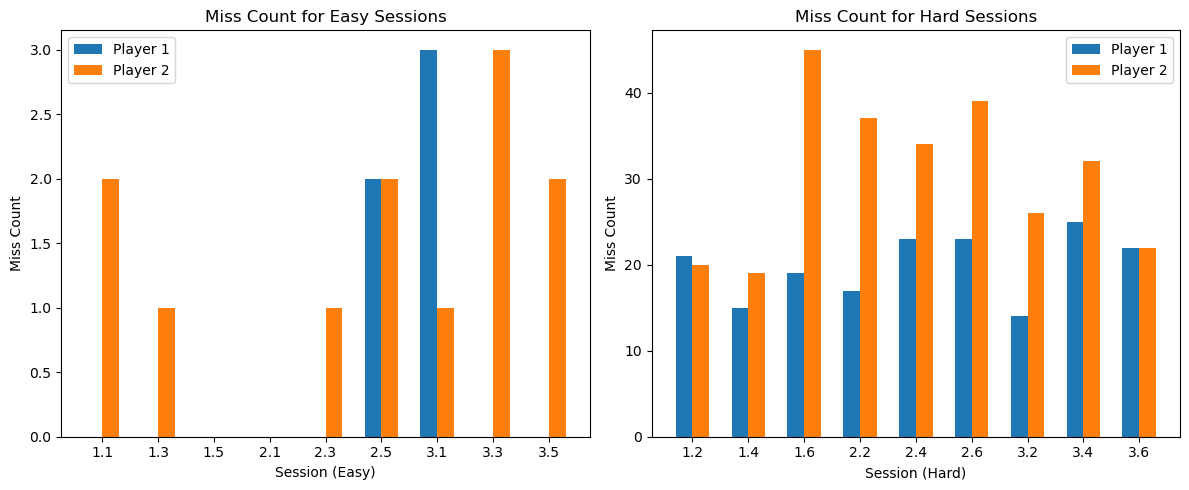

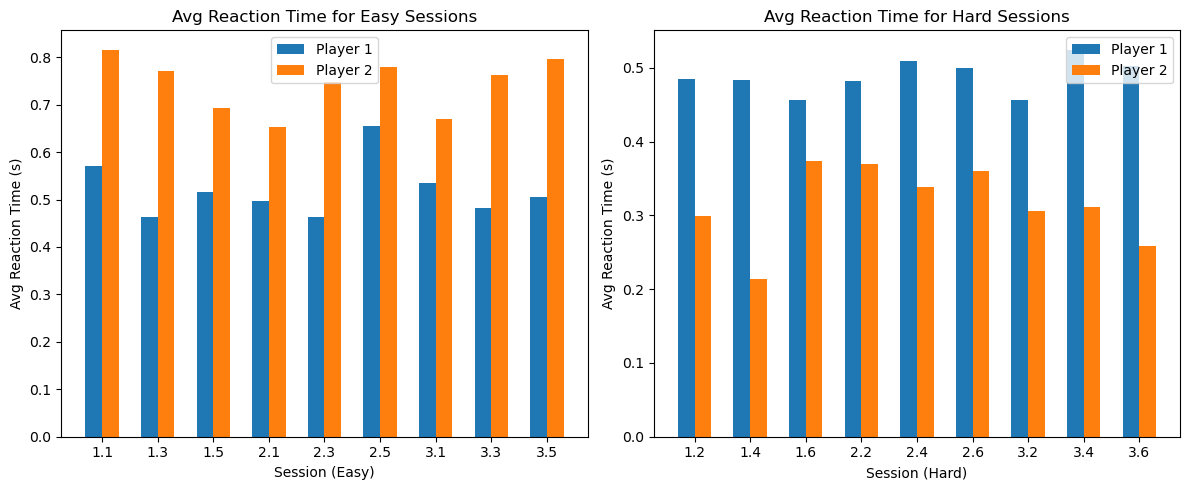

In [25]:

def parse_click_actions(cell_str):
    """
    Parses the cell string and returns a dictionary with:
      - 'miss_count': the number of misses (when "hit" is not True),
      - 'avg_rt': the average reaction time in seconds (disappeared - created).
    """
    match = re.search(r'\[(.*?)\]', cell_str)
    if not match:
        return {'miss_count': None, 'avg_rt': None, 'hit_rate': None}
    
    json_list_str = match.group(1)
    json_objects = json_list_str.split('&')
    
    miss_count = 0
    total_count = 0
    reaction_times = []
    
    for obj_str in json_objects:
        try:
            obj = json.loads(obj_str)
        except Exception:
            continue
        
        if not obj.get('hit', False):
            miss_count += 1
            total_count += 1
        else:
            total_count += 1
        
        created = obj.get('created')
        disappeared = obj.get('disappeared')
        if created and disappeared:
            try:
                # Convert ISO timestamps to datetime objects.
                dt_created = datetime.fromisoformat(created.replace('Z', '+00:00'))
                dt_disappeared = datetime.fromisoformat(disappeared.replace('Z', '+00:00'))
                rt = (dt_disappeared - dt_created).total_seconds()
                reaction_times.append(rt)
            except Exception:
                continue
                
    avg_rt = sum(reaction_times)/len(reaction_times) if reaction_times else None
    
    return {'miss_count': miss_count, 'avg_rt': avg_rt, 'miss_rate': ((miss_count/total_count)*100)}

# Create DataFrames for miss counts and average reaction times.
miss_df = click_actions.copy()
rt_df = click_actions.copy()
miss_rate = click_actions.copy()

for col in click_actions.columns:
    parsed = click_actions[col].apply(parse_click_actions)
    miss_df[col] = parsed.apply(lambda x: x['miss_count'])
    rt_df[col]   = parsed.apply(lambda x: x['avg_rt'])
    miss_rate[col] = parsed.apply(lambda x: x['miss_rate'])

# Group the columns by session type (even = "hard", odd = "easy").
even_sessions_miss = {}
odd_sessions_miss = {}
even_sessions_rt = {}
odd_sessions_rt = {}
even_sessions_miss_rate = {}
odd_sessions_miss_rate = {}

for col in click_actions.columns:
    try:
        session_id = col.split('_')[1].split('.')[0] + "." + col.split('_')[1].split('.')[1]
    except Exception:
        continue
    
    try:
        session_part = int(session_id.split('.')[1])
    except Exception:
        continue
    
    miss_values = list(miss_df[col])
    rt_values   = list(rt_df[col])
    miss_rate_values = list(miss_rate[col])
    
    if session_part % 2 == 0:
        even_sessions_miss[session_id] = miss_values
        even_sessions_rt[session_id]   = rt_values
        even_sessions_miss_rate[session_id] = miss_rate_values
    else:
        odd_sessions_miss[session_id] = miss_values
        odd_sessions_rt[session_id]   = rt_values
        odd_sessions_miss_rate[session_id] = miss_rate_values

# Sort session keys.
sort_key = lambda s: (int(s.split('.')[0]), int(s.split('.')[1]))
odd_keys = sorted(odd_sessions_miss.keys(), key=sort_key)
even_keys = sorted(even_sessions_miss.keys(), key=sort_key)



# Plot for odd (easy) sessions.
x_odd = range(len(odd_keys))
player0_odd = [odd_sessions_miss[s][0] for s in odd_keys]
player1_odd = [odd_sessions_miss[s][1] for s in odd_keys]
# Plot for even (hard) sessions.
x_even = range(len(even_keys))
player0_even = [even_sessions_miss[s][0] for s in even_keys]
player1_even = [even_sessions_miss[s][1] for s in even_keys]
# For odd (easy) sessions.
odd_keys_rt = sorted(odd_sessions_rt.keys(), key=sort_key)
x_odd_rt = range(len(odd_keys_rt))
player0_odd_rt = [odd_sessions_rt[s][0] for s in odd_keys_rt]
player1_odd_rt = [odd_sessions_rt[s][1] for s in odd_keys_rt]
# For even (hard) sessions.
even_keys_rt = sorted(even_sessions_rt.keys(), key=sort_key)
x_even_rt = range(len(even_keys_rt))
player0_even_rt = [even_sessions_rt[s][0] for s in even_keys_rt]
player1_even_rt = [even_sessions_rt[s][1] for s in even_keys_rt]




fig1, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot for odd (easy) sessions
x_odd = range(len(odd_keys))
ax1.bar([i - 0.15 for i in x_odd], player0_odd, width=0.3, label='Player 1')
ax1.bar([i + 0.15 for i in x_odd], player1_odd, width=0.3, label='Player 2')
ax1.set_xticks(x_odd)
ax1.set_xticklabels(odd_keys)
ax1.set_xlabel('Session (Easy)')
ax1.set_ylabel('Miss Count')
ax1.set_title('Miss Count for Easy Sessions')
ax1.legend()

# Plot for even (hard) sessions
x_even = range(len(even_keys))
ax2.bar([i - 0.15 for i in x_even], player0_even, width=0.3, label='Player 1')
ax2.bar([i + 0.15 for i in x_even], player1_even, width=0.3, label='Player 2')
ax2.set_xticks(x_even)
ax2.set_xticklabels(even_keys)
ax2.set_xlabel('Session (Hard)')
ax2.set_ylabel('Miss Count')
ax2.set_title('Miss Count for Hard Sessions')
ax2.legend()

fig1.tight_layout()
plt.show()

# Create a figure with two subplots (side by side) for average reaction times.
fig2, (ax3, ax4) = plt.subplots(1, 2, figsize=(12, 5))

# Plot for odd (easy) sessions reaction times
x_odd_rt = range(len(odd_keys_rt))
ax3.bar([i - 0.15 for i in x_odd_rt], player0_odd_rt, width=0.3, label='Player 1')
ax3.bar([i + 0.15 for i in x_odd_rt], player1_odd_rt, width=0.3, label='Player 2')
ax3.set_xticks(x_odd_rt)
ax3.set_xticklabels(odd_keys_rt)
ax3.set_xlabel('Session (Easy)')
ax3.set_ylabel('Avg Reaction Time (s)')
ax3.set_title('Avg Reaction Time for Easy Sessions')
ax3.legend()

# Plot for even (hard) sessions reaction times
x_even_rt = range(len(even_keys_rt))
ax4.bar([i - 0.15 for i in x_even_rt], player0_even_rt, width=0.3, label='Player 1')
ax4.bar([i + 0.15 for i in x_even_rt], player1_even_rt, width=0.3, label='Player 2')
ax4.set_xticks(x_even_rt)
ax4.set_xticklabels(even_keys_rt)
ax4.set_xlabel('Session (Hard)')
ax4.set_ylabel('Avg Reaction Time (s)')
ax4.set_title('Avg Reaction Time for Hard Sessions')
ax4.legend()

fig2.tight_layout()
plt.show()


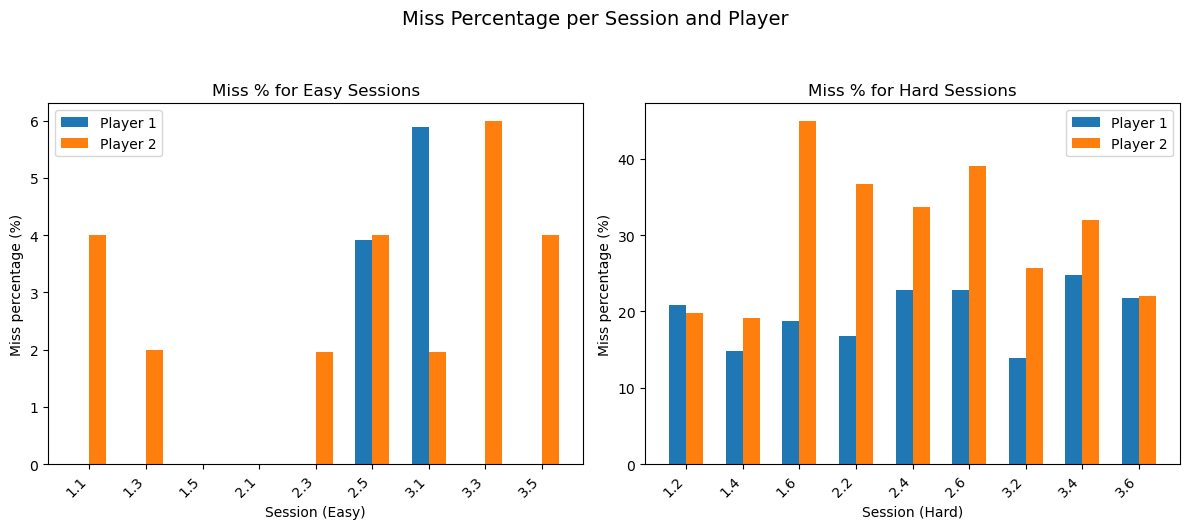

In [26]:
# Let's plot percentages of misses for each session and player

# easy sessions
x_odd_pct = range(len(odd_keys))
p0_odd_pct = [odd_sessions_miss_rate[s][0] for s in odd_keys]
p1_odd_pct = [odd_sessions_miss_rate[s][1] for s in odd_keys]

# hard sessions
x_even_pct = range(len(even_keys))
p0_even_pct = [even_sessions_miss_rate[s][0] for s in even_keys]
p1_even_pct = [even_sessions_miss_rate[s][1] for s in even_keys]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Easy (odd) sessions
ax1.bar([i - 0.15 for i in x_odd_pct], p0_odd_pct, width=0.30, label='Player 1')
ax1.bar([i + 0.15 for i in x_odd_pct], p1_odd_pct, width=0.30, label='Player 2')
ax1.set_xticks(x_odd_pct)
ax1.set_xticklabels(odd_keys, rotation=45, ha='right')
ax1.set_xlabel('Session (Easy)')
ax1.set_ylabel('Miss percentage (%)')
ax1.set_title('Miss % for Easy Sessions')
ax1.legend()

# Hard (even) sessions
ax2.bar([i - 0.15 for i in x_even_pct], p0_even_pct, width=0.30, label='Player 1')
ax2.bar([i + 0.15 for i in x_even_pct], p1_even_pct, width=0.30, label='Player 2')
ax2.set_xticks(x_even_pct)
ax2.set_xticklabels(even_keys, rotation=45, ha='right')
ax2.set_xlabel('Session (Hard)')
ax2.set_ylabel('Miss percentage (%)')
ax2.set_title('Miss % for Hard Sessions')
ax2.legend()

fig.suptitle('Miss Percentage per Session and Player', fontsize=14, y=1.05)
fig.tight_layout()
plt.show()

In [27]:
p0_easy = [odd_sessions_miss_rate[s][0]  for s in odd_keys]
p1_easy = [odd_sessions_miss_rate[s][1]  for s in odd_keys]
p0_hard = [even_sessions_miss_rate[s][0] for s in even_keys]
p1_hard = [even_sessions_miss_rate[s][1] for s in even_keys]

# Easy (odd) and hard (even) session averages
p0_easy_avg  = np.mean(p0_easy)
p1_easy_avg  = np.mean(p1_easy)
p0_hard_avg  = np.mean(p0_hard)
p1_hard_avg  = np.mean(p1_hard)

# Overall averages
p0_overall_avg = np.mean(p0_easy + p0_hard)
p1_overall_avg = np.mean(p1_easy + p1_hard)

print("Average miss percentage (%)")
print("--------------------------------------------")
print(f"Player 1 - Easy sessions : {p0_easy_avg:.2f}%")
print(f"Player 1 - Hard sessions : {p0_hard_avg:.2f}%")
print(f"Player 1 - Overall       : {p0_overall_avg:.2f}%")
print()
print(f"Player 2 - Easy sessions : {p1_easy_avg:.2f}%")
print(f"Player 2 - Hard sessions : {p1_hard_avg:.2f}%")
print(f"Player 2 - Overall       : {p1_overall_avg:.2f}%")

Average miss percentage (%)
--------------------------------------------
Player 1 - Easy sessions : 1.09%
Player 1 - Hard sessions : 19.69%
Player 1 - Overall       : 10.39%

Player 2 - Easy sessions : 2.66%
Player 2 - Hard sessions : 30.34%
Player 2 - Overall       : 16.50%


In [56]:
def ies(rt, miss_rate_pct):
    """Return IES given avg reaction‑time (s) and miss‑rate in percent."""
    if rt is None or miss_rate_pct is None:
        return np.nan
    p_correct = 1 - miss_rate_pct / 100.0
    return rt / p_correct if p_correct > 0 else np.nan

# 1) per‑session IES values ---------------------------------------------------
ies_easy_p0  = [ies(odd_sessions_rt[s][0],  odd_sessions_miss_rate[s][0]) for s in odd_keys]
ies_easy_p1  = [ies(odd_sessions_rt[s][1],  odd_sessions_miss_rate[s][1]) for s in odd_keys]

ies_hard_p0  = [ies(even_sessions_rt[s][0], even_sessions_miss_rate[s][0]) for s in even_keys]
ies_hard_p1  = [ies(even_sessions_rt[s][1], even_sessions_miss_rate[s][1]) for s in even_keys]

# 2) aggregate (overall) IES --------------------------------------------------
# here we just average the session‑wise IES values, skipping NaNs
overall_easy_p0  = np.nanmean(ies_easy_p0)
overall_easy_p1  = np.nanmean(ies_easy_p1)
overall_hard_p0  = np.nanmean(ies_hard_p0)
overall_hard_p1  = np.nanmean(ies_hard_p1)

overall_player0  = np.nanmean(ies_easy_p0 + ies_hard_p0)
overall_player1  = np.nanmean(ies_easy_p1 + ies_hard_p1)

# 3) pretty print -------------------------------------------------------------
tbl = pd.DataFrame(
    {
        "Easy sessions": [overall_easy_p0,  overall_easy_p1],
        "Hard sessions": [overall_hard_p0,  overall_hard_p1],
        "Overall":       [overall_player0,  overall_player1],
    },
    index=["Player 1", "Player 2"],
)

print("\n==========  Inverse Efficiency Score (IES)  ==========")
display(tbl.style.format("{:.2f}"))
print("IES = average reaction‑time / proportion correct\n"
      "(lower = better)\n")


==========  Inverse Efficiency Score (IES)  ==========


,Easy sessions,Hard sessions,Overall
Player 1,0.53,0.61,0.57
Player 2,0.76,0.47,0.62


IES = average reaction‑time / proportion correct
(lower = better)



___
# Interpretation of Math Task
Now that we know how the players performed in the click task, let's continue with the math task

In [28]:
# let's get all columns that contain the string "math Task" from the math df
math_actions = df_mathTask.loc[:, df_mathTask.columns.str.contains('math_actions')]
math_actions.head()

,mathTask_1.1.player.math_actions,mathTask_1.2.player.math_actions,mathTask_1.3.player.math_actions,mathTask_1.4.player.math_actions,mathTask_1.5.player.math_actions,mathTask_1.6.player.math_actions,mathTask_2.1.player.math_actions,mathTask_2.2.player.math_actions,mathTask_2.3.player.math_actions,mathTask_2.4.player.math_actions,mathTask_2.5.player.math_actions,mathTask_2.6.player.math_actions,mathTask_3.1.player.math_actions,mathTask_3.2.player.math_actions,mathTask_3.3.player.math_actions,mathTask_3.4.player.math_actions,mathTask_3.5.player.math_actions,mathTask_3.6.player.math_actions
1,;onLoad;Thu Mar 06 2025 16:28:55 GMT+0100 (Mit...,;onLoad;Thu Mar 06 2025 16:30:50 GMT+0100 (Mit...,;onLoad;Thu Mar 06 2025 16:32:26 GMT+0100 (Mit...,;onLoad;Thu Mar 06 2025 16:33:57 GMT+0100 (Mit...,;onLoad;Thu Mar 06 2025 16:35:25 GMT+0100 (Mit...,;onLoad;Thu Mar 06 2025 16:36:51 GMT+0100 (Mit...,;onLoad;Thu Mar 06 2025 17:17:56 GMT+0100 (Mit...,;onLoad;Thu Mar 06 2025 17:19:33 GMT+0100 (Mit...,;onLoad;Thu Mar 06 2025 17:21:02 GMT+0100 (Mit...,;onLoad;Thu Mar 06 2025 17:22:28 GMT+0100 (Mit...,;onLoad;Thu Mar 06 2025 17:23:59 GMT+0100 (Mit...,;onLoad;Thu Mar 06 2025 17:25:25 GMT+0100 (Mit...,;onLoad;Thu Mar 06 2025 17:49:45 GMT+0100 (Mit...,;onLoad;Thu Mar 06 2025 17:51:08 GMT+0100 (Mit...,;onLoad;Thu Mar 06 2025 17:52:32 GMT+0100 (Mit...,;onLoad;Thu Mar 06 2025 17:53:56 GMT+0100 (Mit...,;onLoad;Thu Mar 06 2025 17:55:18 GMT+0100 (Mit...,;onLoad;Thu Mar 06 2025 17:56:40 GMT+0100 (Mit...
2,;onLoad;Thu Mar 06 2025 16:40:12 GMT+0100 (Mit...,;onLoad;Thu Mar 06 2025 16:42:03 GMT+0100 (Mit...,;onLoad;Thu Mar 06 2025 16:43:40 GMT+0100 (Mit...,;onLoad;Thu Mar 06 2025 16:45:58 GMT+0100 (Mit...,;onLoad;Thu Mar 06 2025 16:48:25 GMT+0100 (Mit...,;onLoad;Thu Mar 06 2025 16:50:06 GMT+0100 (Mit...,;onLoad;Thu Mar 06 2025 17:15:39 GMT+0100 (Mit...,;onLoad;Thu Mar 06 2025 17:17:06 GMT+0100 (Mit...,;onLoad;Thu Mar 06 2025 17:18:36 GMT+0100 (Mit...,;onLoad;Thu Mar 06 2025 17:20:06 GMT+0100 (Mit...,;onLoad;Thu Mar 06 2025 17:21:41 GMT+0100 (Mit...,;onLoad;Thu Mar 06 2025 17:23:17 GMT+0100 (Mit...,;onLoad;Thu Mar 06 2025 17:47:52 GMT+0100 (Mit...,;onLoad;Thu Mar 06 2025 17:49:25 GMT+0100 (Mit...,;onLoad;Thu Mar 06 2025 17:51:19 GMT+0100 (Mit...,;onLoad;Thu Mar 06 2025 17:53:11 GMT+0100 (Mit...,;onLoad;Thu Mar 06 2025 17:54:43 GMT+0100 (Mit...,;onLoad;Thu Mar 06 2025 17:56:14 GMT+0100 (Mit...


In [29]:
def parse_math_actions(cell_str):
    """
    Parses a cell string from math_actions and returns a dictionary with:
      - 'avg_trialDuration': the average trialDuration (as a float)
      - 'wrong_count': the number of trials where the evaluated equation 
                       does not match the response.
                       
    The function looks for patterns of the form:
      equation=...&response=...&trialDuration=...&time=
    """
    # Use regex to find all trial events
    pattern = r"equation=([^&]+)&response=([^&]*)&trialDuration=([^&]+)&time="
    matches = re.findall(pattern, cell_str)
    
    trial_durations = []
    wrong_count = 0
    
    for eq_str, response_str, duration_str in matches:
        try:
            duration = float(duration_str)
            trial_durations.append(duration)
        except Exception:
            pass
        
        # Evaluate the equation (Equations)
        try:
            numbers = [int(x) for x in eq_str.split('+')]
            correct_sum = sum(numbers)
        except Exception:
            continue
        
        # Checking response.
        try:
            # If response is empty or non-numeric, count as wrong. -> Maybe Timeout relevant here? 
            if response_str == "":
                wrong_count += 1
            else:
                response_val = int(response_str)
                if response_val != correct_sum:
                    wrong_count += 1
        except Exception:
            wrong_count += 1

     
    avg_trialDuration = sum(trial_durations) / len(trial_durations) if trial_durations else None # TODO HIER DEN ITER FEHLER FIXEN 
    # print(f'avg_trialDuration: {avg_trialDuration}')
    print(f'data {trial_durations}')

    
    return {'avg_trialDuration': avg_trialDuration, 'wrong_count': wrong_count}

# Create DataFrames for average trial duration and wrong counts.
avg_td_df = math_actions.copy()
wrong_df   = math_actions.copy()

# print(math_actions.columns)

for col in math_actions.columns:
    parsed = math_actions[col].apply(parse_math_actions)
    avg_td_df[col] = parsed.apply(lambda x: x['avg_trialDuration'])
    wrong_df[col]   = parsed.apply(lambda x: x['wrong_count'])

# Group the columns by session type.
even_sessions_td = {}
odd_sessions_td  = {}
even_sessions_wrong = {}
odd_sessions_wrong  = {}

for col in math_actions.columns:
    try:
        # Extract session id, e.g. "1.1" from "mathTask_1.1.player.math_actions"
        session_id = col.split('_')[1].split('.')[0] + "." + col.split('_')[1].split('.')[1]
    except Exception:
        continue
    
    try:
        # Determine session type based on the number after the dot.
        session_part = int(session_id.split('.')[1])
    except Exception:
        continue
    
    td_values    = list(avg_td_df[col])
    print(f'td_vals:',td_values)
    wrong_values = list(wrong_df[col])
    
    if session_part % 2 == 0:
        even_sessions_td[session_id]   = td_values
        even_sessions_wrong[session_id] = wrong_values
    else:
        odd_sessions_td[session_id]    = td_values
        odd_sessions_wrong[session_id] = wrong_values

# Sort the session keys in numeric order.
sort_key = lambda s: (int(s.split('.')[0]), int(s.split('.')[1]))
odd_keys  = sorted(odd_sessions_td.keys(), key=sort_key)
even_keys = sorted(even_sessions_td.keys(), key=sort_key)

avg_td_df.head()

data [8670.0, 6789.0, 9111.0, 7643.0, 6458.0, 5085.0, 4985.0, 200.0]
data [9361.0, 11717.0, 5412.0, 10161.0, 5615.0, 7290.0, 2410.0]
data [8331.0, 9018.0, 7523.0, 19054.0, 9241.0, 1751.0]
data [15285.0, 17644.0, 7195.0, 6770.0, 11091.0]
data [7554.0, 6926.0, 5003.0, 4841.0, 6436.0, 6914.0, 6945.0, 2875.0, 4310.0]
data [8965.0, 4869.0, 7451.0, 3069.0, 5044.0, 6048.0, 5267.0, 3390.0, 1781.0]
data [14374.0, 16213.0, 9328.0, 9636.0, 8410.0]
data [20010.0, 11129.0, 20010.0, 9830.0]
data [3700.0, 14704.0, 4248.0, 4532.0, 5982.0, 6654.0, 6114.0, 3002.0]
data [5573.0, 8463.0, 3994.0, 6671.0, 3945.0, 6412.0, 5486.0, 6443.0, 8409.0]
data [8070.0, 12102.0, 6304.0, 7197.0, 11639.0, 9189.0, 9640.0]
data [5165.0, 10213.0, 9410.0, 7855.0, 11032.0, 8264.0, 4.0]
data [6913.0, 6121.0, 4679.0, 5662.0, 4462.0, 7383.0, 5010.0, 3892.0, 1790.0]
data [3913.0, 5731.0, 9584.0, 3472.0, 3878.0, 3598.0, 4082.0, 3495.0, 4355.0, 811.0]
data [7515.0, 9343.0, 17170.0, 11035.0, 8625.0, 1250.0]
data [10544.0, 10053.0, 5

,mathTask_1.1.player.math_actions,mathTask_1.2.player.math_actions,mathTask_1.3.player.math_actions,mathTask_1.4.player.math_actions,mathTask_1.5.player.math_actions,mathTask_1.6.player.math_actions,mathTask_2.1.player.math_actions,mathTask_2.2.player.math_actions,mathTask_2.3.player.math_actions,mathTask_2.4.player.math_actions,mathTask_2.5.player.math_actions,mathTask_2.6.player.math_actions,mathTask_3.1.player.math_actions,mathTask_3.2.player.math_actions,mathTask_3.3.player.math_actions,mathTask_3.4.player.math_actions,mathTask_3.5.player.math_actions,mathTask_3.6.player.math_actions
1,6117.625000,9153.0,5756.000000,11592.20,6117.000000,9163.000000,5101.333333,9156.333333,5099.111111,9445.571429,6330.444444,9155.000000,5103.000000,9161.000000,6116.625,9161.166667,6037.555556,9162.50
2,7423.714286,11597.0,5098.222222,15244.75,6155.111111,7420.428571,4291.900000,9158.166667,5102.111111,15218.000000,8548.571429,9154.333333,6101.555556,9156.666667,6117.250,11595.200000,6110.375000,15246.75


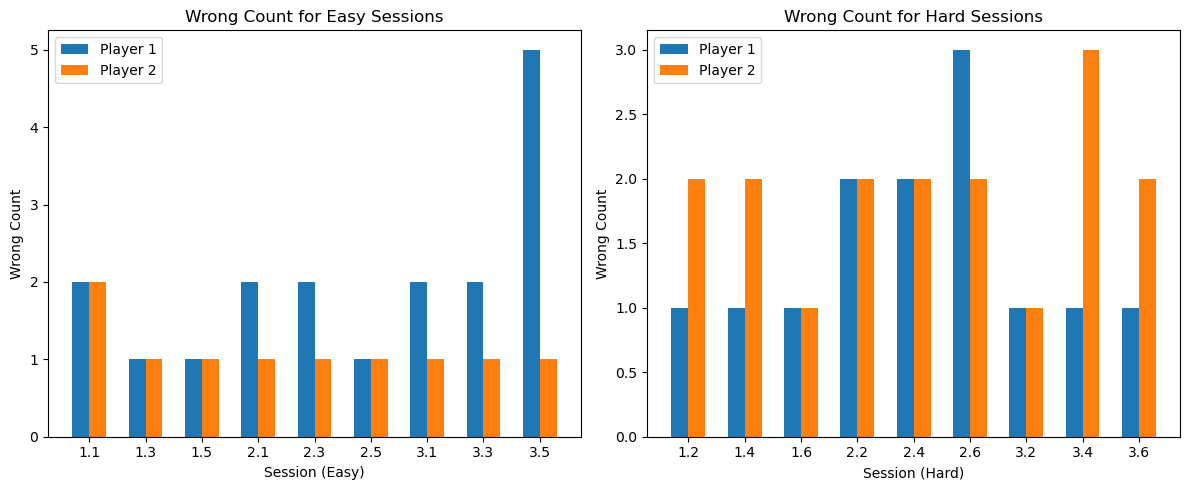

[11597.0, 15244.75, 7420.428571428572, 9158.166666666666, 15218.0, 9154.333333333334, 9156.666666666666, 11595.2, 15246.75]
[9153.0, 11592.2, 9163.0, 9156.333333333334, 9445.57142857143, 9155.0, 9161.0, 9161.166666666666, 9162.5]


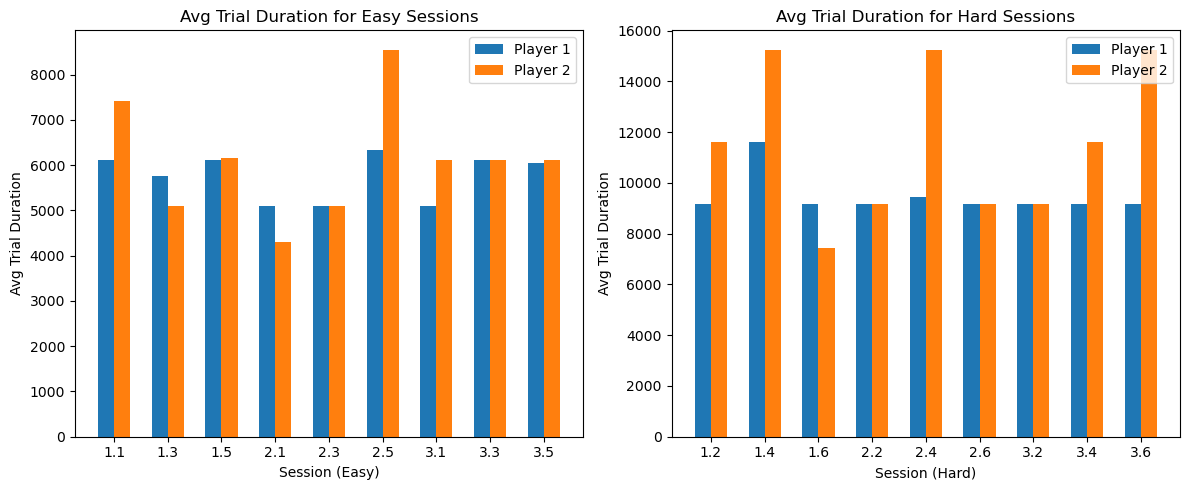

In [30]:

# Plotting results
# Create a figure with two subplots (side by side) for wrong counts.
fig1, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Easy sessions (odd-numbered)
x_odd = range(len(odd_keys))
player0_odd = [odd_sessions_wrong[s][0] for s in odd_keys]
player1_odd = [odd_sessions_wrong[s][1] for s in odd_keys]

ax1.bar([i - 0.15 for i in x_odd], player0_odd, width=0.3, label='Player 1')
ax1.bar([i + 0.15 for i in x_odd], player1_odd, width=0.3, label='Player 2')
ax1.set_xticks(x_odd)
ax1.set_xticklabels(odd_keys)
ax1.set_xlabel('Session (Easy)')
ax1.set_ylabel('Wrong Count')
ax1.set_title('Wrong Count for Easy Sessions')
ax1.legend()

# Hard sessions (even-numbered)
x_even = range(len(even_keys))
player0_even = [even_sessions_wrong[s][0] for s in even_keys]
player1_even = [even_sessions_wrong[s][1] for s in even_keys]

ax2.bar([i - 0.15 for i in x_even], player0_even, width=0.3, label='Player 1')
ax2.bar([i + 0.15 for i in x_even], player1_even, width=0.3, label='Player 2')
ax2.set_xticks(x_even)
ax2.set_xticklabels(even_keys)
ax2.set_xlabel('Session (Hard)')
ax2.set_ylabel('Wrong Count')
ax2.set_title('Wrong Count for Hard Sessions')
ax2.legend()

fig1.tight_layout()
plt.show()

# --- Plotting Average Trial Duration ---

# Create a figure with two subplots (side by side) for average trial duration.
fig2, (ax3, ax4) = plt.subplots(1, 2, figsize=(12, 5))

# Easy sessions (odd-numbered)
x_odd_td = range(len(odd_keys))
player0_odd_td = [odd_sessions_td[s][0] for s in odd_keys]
player1_odd_td = [odd_sessions_td[s][1] for s in odd_keys]

ax3.bar([i - 0.15 for i in x_odd_td], player0_odd_td, width=0.3, label='Player 1')
ax3.bar([i + 0.15 for i in x_odd_td], player1_odd_td, width=0.3, label='Player 2')
ax3.set_xticks(x_odd_td)
ax3.set_xticklabels(odd_keys)
ax3.set_xlabel('Session (Easy)')
ax3.set_ylabel('Avg Trial Duration')
ax3.set_title('Avg Trial Duration for Easy Sessions')
ax3.legend()

# Hard sessions (even-numbered)
x_even_td = range(len(even_keys))
player0_even_td = [even_sessions_td[s][0] for s in even_keys]
player1_even_td = [even_sessions_td[s][1] for s in even_keys]

print(player1_even_td)
print(player0_even_td)

ax4.bar([i - 0.15 for i in x_even_td], player0_even_td, width=0.3, label='Player 1')
ax4.bar([i + 0.15 for i in x_even_td], player1_even_td, width=0.3, label='Player 2')
ax4.set_xticks(x_even_td)
ax4.set_xticklabels(even_keys)
ax4.set_xlabel('Session (Hard)')
ax4.set_ylabel('Avg Trial Duration')
ax4.set_title('Avg Trial Duration for Hard Sessions')
ax4.legend()

fig2.tight_layout()
plt.show()



=========  WRONG‑ANSWER PERCENTAGE  =========
Player 1  Easy sessions:  13.04% (9/69)
Player 1  Hard sessions:   8.70% (4/46)

Player 2  Easy sessions:   1.49% (1/67)
Player 2  Hard sessions:  20.51% (8/39)



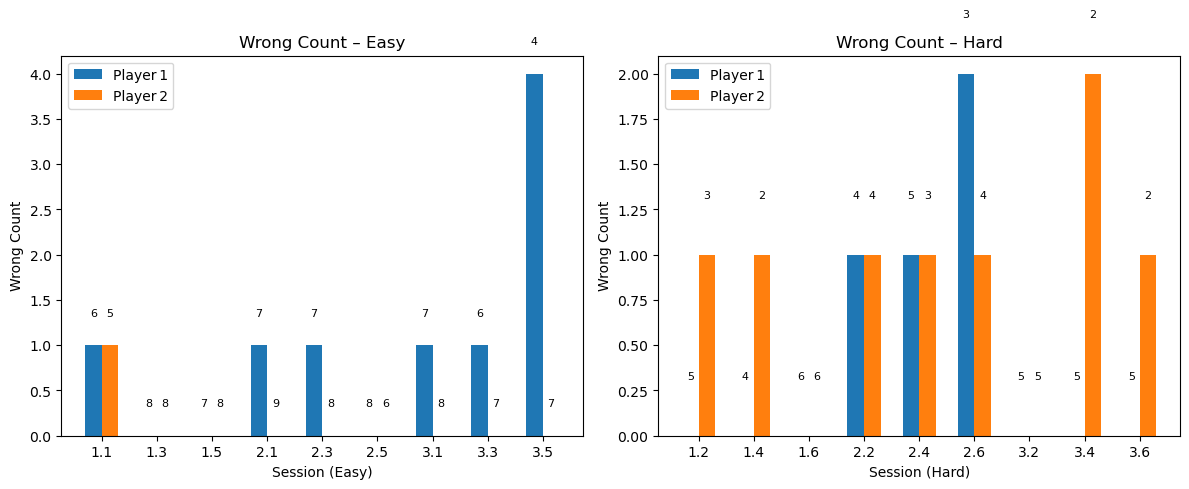

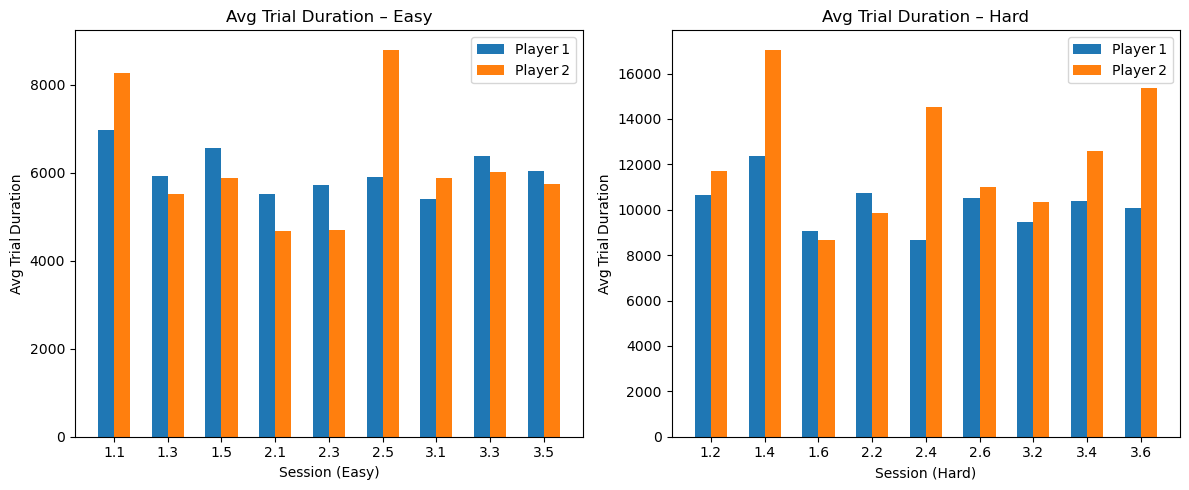

In [ ]:
def parse_math_actions(cell_str: str) -> dict:
    """
    Extracts information from a math_actions cell.

    Returns a dict with
        - avg_trialDuration : mean of the trialDuration values (float or None)
        - wrong_count       : number of trials answered incorrectly
        - trial_count       : total number of trials found
    """
    pattern = r"equation=([^&]+)&response=([^&]*)&trialDuration=([^&]+)&time="
    matches = re.findall(pattern, cell_str)

    if matches:
        matches = matches[:-1] 

    trial_durations = []
    wrong_count     = 0

    for eq_str, response_str, duration_str in matches:
        # collect duration
        try:
            trial_durations.append(float(duration_str))
        except Exception:
            pass

        # evaluate equation
        try:
            numbers     = [int(x) for x in eq_str.split('+')]
            correct_sum = sum(numbers)
        except Exception:
            # malformed equation → treat as wrong
            wrong_count += 1
            continue

        # compare response
        try:
            if response_str == "" or int(response_str) != correct_sum:
                wrong_count += 1
        except Exception:
            wrong_count += 1

    trial_count       = len(trial_durations)
    avg_trialDuration = (sum(trial_durations) / trial_count) if trial_count else None

    return {
        "avg_trialDuration": avg_trialDuration,
        "wrong_count": wrong_count,
        "trial_count": trial_count,
    }



# create dfs 
avg_td_df  = math_actions.copy()
wrong_df   = math_actions.copy()
trial_df   = math_actions.copy()

for col in math_actions.columns:
    parsed = math_actions[col].apply(parse_math_actions)
    avg_td_df[col]  = parsed.map(lambda d: d["avg_trialDuration"])
    wrong_df[col]   = parsed.map(lambda d: d["wrong_count"])
    trial_df[col]   = parsed.map(lambda d: d["trial_count"])

# separting sessiosn ->task, session und easy/ hard
even_sessions_td,  odd_sessions_td   = {}, {}
even_sessions_wrong, odd_sessions_wrong = {}, {}
even_sessions_trial, odd_sessions_trial = {}, {}

for col in math_actions.columns:
    # Example column:  "mathTask_1.1.player.math_actions"
    try:
        part = col.split("_")[1]                     # 1.1.player
        session_id = part.split(".")[0] + "." + part.split(".")[1]  # '1.1'
    except Exception:
        continue

    try:
        session_part = int(session_id.split(".")[1])  # 1 → odd, 2 → even, ...
    except Exception:
        continue

    if session_part % 2 == 0:     
        even_sessions_td[session_id]    = list(avg_td_df[col])
        even_sessions_wrong[session_id] = list(wrong_df[col])
        even_sessions_trial[session_id] = list(trial_df[col])
    else:                         
        odd_sessions_td[session_id]     = list(avg_td_df[col])
        odd_sessions_wrong[session_id]  = list(wrong_df[col])
        odd_sessions_trial[session_id]  = list(trial_df[col])


def sort_key(s): return (int(s.split(".")[0]), int(s.split(".")[1]))
odd_keys  = sorted(odd_sessions_td.keys(),  key=sort_key)
even_keys = sorted(even_sessions_td.keys(), key=sort_key)



def total_wrong_and_trials(session_dict_wrong, session_dict_trial):
    """Return total wrong and total trials for player 0 and player 1."""
    w0 = sum(vals[0] for vals in session_dict_wrong.values())
    w1 = sum(vals[1] for vals in session_dict_wrong.values())
    t0 = sum(vals[0] for vals in session_dict_trial.values())
    t1 = sum(vals[1] for vals in session_dict_trial.values())
    return w0, w1, t0, t1

# easy
w0_easy, w1_easy, t0_easy, t1_easy = total_wrong_and_trials(
    odd_sessions_wrong, odd_sessions_trial
)
# hard
w0_hard, w1_hard, t0_hard, t1_hard = total_wrong_and_trials(
    even_sessions_wrong, even_sessions_trial
)

def pct(wrong, total):
    return 100 * wrong / total if total else float('nan')

print("\n WRONG‑ANSWER PERCENTAGE")
print(f"Player 1  Easy sessions: {pct(w0_easy, t0_easy):6.2f}% "
      f"({w0_easy}/{t0_easy})")
print(f"Player 1  Hard sessions: {pct(w0_hard, t0_hard):6.2f}% "
      f"({w0_hard}/{t0_hard})\n")
print(f"Player 2  Easy sessions: {pct(w1_easy, t1_easy):6.2f}% "
      f"({w1_easy}/{t1_easy})")
print(f"Player 2  Hard sessions: {pct(w1_hard, t1_hard):6.2f}% "
      f"({w1_hard}/{t1_hard})")






# plot wrongs
fig1, (ax_easy, ax_hard) = plt.subplots(1, 2, figsize=(12, 5))

# for easy sessions
x_odd           = np.arange(len(odd_keys))
p0_wrong_odd    = [odd_sessions_wrong[s][0] for s in odd_keys]
p1_wrong_odd    = [odd_sessions_wrong[s][1] for s in odd_keys]
p0_trials_odd   = [odd_sessions_trial[s][0] for s in odd_keys]
p1_trials_odd   = [odd_sessions_trial[s][1] for s in odd_keys]

bars0 = ax_easy.bar(x_odd - 0.15, p0_wrong_odd, width=0.3, label="Player 1")
bars1 = ax_easy.bar(x_odd + 0.15, p1_wrong_odd, width=0.3, label="Player 2")

for i, bar in enumerate(bars0):
    correct = p0_trials_odd[i] - p0_wrong_odd[i]
    ax_easy.text(bar.get_x() + bar.get_width()/2,
                 bar.get_height() + 0.3,
                 str(correct),
                 ha="center", va="bottom", fontsize=8)
for i, bar in enumerate(bars1):
    correct = p1_trials_odd[i] - p1_wrong_odd[i]
    ax_easy.text(bar.get_x() + bar.get_width()/2,
                 bar.get_height() + 0.3,
                 str(correct),
                 ha="center", va="bottom", fontsize=8)

ax_easy.set_xticks(x_odd)
ax_easy.set_xticklabels(odd_keys)
ax_easy.set_xlabel("Session (Easy)")
ax_easy.set_ylabel("Wrong Count")
ax_easy.set_title("Wrong Count – Easy")
ax_easy.legend()

# for hard sessions
x_even           = np.arange(len(even_keys))
p0_wrong_even    = [even_sessions_wrong[s][0] for s in even_keys]
p1_wrong_even    = [even_sessions_wrong[s][1] for s in even_keys]
p0_trials_even   = [even_sessions_trial[s][0] for s in even_keys]
p1_trials_even   = [even_sessions_trial[s][1] for s in even_keys]

bars2 = ax_hard.bar(x_even - 0.15, p0_wrong_even, width=0.3, label="Player 1")
bars3 = ax_hard.bar(x_even + 0.15, p1_wrong_even, width=0.3, label="Player 2")

for i, bar in enumerate(bars2):
    correct = p0_trials_even[i] - p0_wrong_even[i]
    ax_hard.text(bar.get_x() + bar.get_width()/2,
                 bar.get_height() + 0.3,
                 str(correct),
                 ha="center", va="bottom", fontsize=8)
for i, bar in enumerate(bars3):
    correct = p1_trials_even[i] - p1_wrong_even[i]
    ax_hard.text(bar.get_x() + bar.get_width()/2,
                 bar.get_height() + 0.3,
                 str(correct),
                 ha="center", va="bottom", fontsize=8)

ax_hard.set_xticks(x_even)
ax_hard.set_xticklabels(even_keys)
ax_hard.set_xlabel("Session (Hard)")
ax_hard.set_ylabel("Wrong Count")
ax_hard.set_title("Wrong Count – Hard")
ax_hard.legend()

fig1.tight_layout()
plt.show()


#plotting avg times

fig2, (ax_td_easy, ax_td_hard) = plt.subplots(1, 2, figsize=(12, 5))

# easy
p0_td_odd = [odd_sessions_td[s][0] for s in odd_keys]
p1_td_odd = [odd_sessions_td[s][1] for s in odd_keys]
ax_td_easy.bar(x_odd - 0.15, p0_td_odd, width=0.3, label="Player 1")
ax_td_easy.bar(x_odd + 0.15, p1_td_odd, width=0.3, label="Player 2")
ax_td_easy.set_xticks(x_odd)
ax_td_easy.set_xticklabels(odd_keys)
ax_td_easy.set_xlabel("Session (Easy)")
ax_td_easy.set_ylabel("Avg Trial Duration")
ax_td_easy.set_title("Avg Trial Duration – Easy")
ax_td_easy.legend()

# hard
p0_td_even = [even_sessions_td[s][0] for s in even_keys]
p1_td_even = [even_sessions_td[s][1] for s in even_keys]
ax_td_hard.bar(x_even - 0.15, p0_td_even, width=0.3, label="Player 1")
ax_td_hard.bar(x_even + 0.15, p1_td_even, width=0.3, label="Player 2")
ax_td_hard.set_xticks(x_even)
ax_td_hard.set_xticklabels(even_keys)
ax_td_hard.set_xlabel("Session (Hard)")
ax_td_hard.set_ylabel("Avg Trial Duration")
ax_td_hard.set_title("Avg Trial Duration – Hard")
ax_td_hard.legend()

fig2.tight_layout()
plt.show()


___

# Checking Occurance of Other Variables
### First let's check the occurance in the tasks

In [32]:
mf_cols =  df_clean.loc[:, df_clean.columns.str.contains('mf_')]
mf_cols.head()

,headphones_setup_1.1.player.mf_01,headphones_setup_1.1.player.mf_02,headphones_setup_1.1.player.mf_03,headphones_setup_1.1.player.mf_04,mathTask_1.8.player.mf_01,mathTask_1.8.player.mf_02,mathTask_1.8.player.mf_03,mathTask_1.8.player.mf_04,clickTask_1.8.player.mf_01,clickTask_1.8.player.mf_02,...,mathTask_3.8.player.mf_03,mathTask_3.8.player.mf_04,clickTask_3.8.player.mf_01,clickTask_3.8.player.mf_02,clickTask_3.8.player.mf_03,clickTask_3.8.player.mf_04,headphones_finish_3.1.player.mf_01,headphones_finish_3.1.player.mf_02,headphones_finish_3.1.player.mf_03,headphones_finish_3.1.player.mf_04
1,6,6,1,2,7,6,2,2,7,7,...,1,1,7,7,1,1,0,0,0,0
2,4,5,2,3,3,3,5,5,2,2,...,6,6,2,2,5,5,0,0,0,0


In [33]:
mf_cols.drop(columns=mf_cols.columns[mf_cols.eq(0).all()], inplace=True)
mf_cols.head()

/var/folders/ml/fyq5x5t55wx4129dn03n32hm0000gn/T/ipykernel_44285/3138526091.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mf_cols.drop(columns=mf_cols.columns[mf_cols.eq(0).all()], inplace=True)


,headphones_setup_1.1.player.mf_01,headphones_setup_1.1.player.mf_02,headphones_setup_1.1.player.mf_03,headphones_setup_1.1.player.mf_04,mathTask_1.8.player.mf_01,mathTask_1.8.player.mf_02,mathTask_1.8.player.mf_03,mathTask_1.8.player.mf_04,clickTask_1.8.player.mf_01,clickTask_1.8.player.mf_02,...,headphones_setup_3.1.player.mf_03,headphones_setup_3.1.player.mf_04,mathTask_3.8.player.mf_01,mathTask_3.8.player.mf_02,mathTask_3.8.player.mf_03,mathTask_3.8.player.mf_04,clickTask_3.8.player.mf_01,clickTask_3.8.player.mf_02,clickTask_3.8.player.mf_03,clickTask_3.8.player.mf_04
1,6,6,1,2,7,6,2,2,7,7,...,1,1,7,7,1,1,7,7,1,1
2,4,5,2,3,3,3,5,5,2,2,...,5,5,2,2,6,6,2,2,5,5


In [47]:
print(mf_cols.keys())

Index(['headphones_setup_1.1.player.mf_01',
       'headphones_setup_1.1.player.mf_02',
       'headphones_setup_1.1.player.mf_03',
       'headphones_setup_1.1.player.mf_04', 'mathTask_1.8.player.mf_01',
       'mathTask_1.8.player.mf_02', 'mathTask_1.8.player.mf_03',
       'mathTask_1.8.player.mf_04', 'clickTask_1.8.player.mf_01',
       'clickTask_1.8.player.mf_02', 'clickTask_1.8.player.mf_03',
       'clickTask_1.8.player.mf_04', 'headphones_setup_2.1.player.mf_01',
       'headphones_setup_2.1.player.mf_02',
       'headphones_setup_2.1.player.mf_03',
       'headphones_setup_2.1.player.mf_04', 'mathTask_2.8.player.mf_01',
       'mathTask_2.8.player.mf_02', 'mathTask_2.8.player.mf_03',
       'mathTask_2.8.player.mf_04', 'clickTask_2.8.player.mf_01',
       'clickTask_2.8.player.mf_02', 'clickTask_2.8.player.mf_03',
       'clickTask_2.8.player.mf_04', 'headphones_setup_3.1.player.mf_01',
       'headphones_setup_3.1.player.mf_02',
       'headphones_setup_3.1.player.mf_03',
  

___


In [34]:
mr_cols =  df_clean.loc[:, df_clean.columns.str.contains('mr_')]
mr_cols.head()

,headphones_setup_1.1.player.mr_mood,headphones_setup_1.1.player.mr_sleepy,headphones_setup_1.1.player.mr_motivy,mathTask_1.1.player.mr_mood,mathTask_1.1.player.mr_sleepy,mathTask_1.1.player.mr_motivy,mathTask_1.2.player.mr_mood,mathTask_1.2.player.mr_sleepy,mathTask_1.2.player.mr_motivy,mathTask_1.3.player.mr_mood,...,clickTask_3.5.player.mr_motivy,clickTask_3.6.player.mr_mood,clickTask_3.6.player.mr_sleepy,clickTask_3.6.player.mr_motivy,clickTask_3.8.player.mr_mood,clickTask_3.8.player.mr_sleepy,clickTask_3.8.player.mr_motivy,headphones_finish_3.1.player.mr_mood,headphones_finish_3.1.player.mr_sleepy,headphones_finish_3.1.player.mr_motivy
1,48,89,85,85,82,90,81,78,84,79,...,57,50,50,50,54,53,54,0,0,0
2,64,62,74,72,75,73,47,62,47,66,...,14,38,28,9,48,26,16,0,0,0


In [35]:
mr_cols.drop(columns=mr_cols.columns[mr_cols.eq(0).all()], inplace=True)
mr_cols.head()

/var/folders/ml/fyq5x5t55wx4129dn03n32hm0000gn/T/ipykernel_44285/2412992522.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mr_cols.drop(columns=mr_cols.columns[mr_cols.eq(0).all()], inplace=True)


,headphones_setup_1.1.player.mr_mood,headphones_setup_1.1.player.mr_sleepy,headphones_setup_1.1.player.mr_motivy,mathTask_1.1.player.mr_mood,mathTask_1.1.player.mr_sleepy,mathTask_1.1.player.mr_motivy,mathTask_1.2.player.mr_mood,mathTask_1.2.player.mr_sleepy,mathTask_1.2.player.mr_motivy,mathTask_1.3.player.mr_mood,...,clickTask_3.4.player.mr_motivy,clickTask_3.5.player.mr_mood,clickTask_3.5.player.mr_sleepy,clickTask_3.5.player.mr_motivy,clickTask_3.6.player.mr_mood,clickTask_3.6.player.mr_sleepy,clickTask_3.6.player.mr_motivy,clickTask_3.8.player.mr_mood,clickTask_3.8.player.mr_sleepy,clickTask_3.8.player.mr_motivy
1,48,89,85,85,82,90,81,78,84,79,...,60,57,57,57,50,50,50,54,53,54
2,64,62,74,72,75,73,47,62,47,66,...,17,39,21,14,38,28,9,48,26,16


In [54]:
print(mr_cols.keys().tolist())


['headphones_setup_1.1.player.mr_mood', 'headphones_setup_1.1.player.mr_sleepy', 'headphones_setup_1.1.player.mr_motivy', 'mathTask_1.1.player.mr_mood', 'mathTask_1.1.player.mr_sleepy', 'mathTask_1.1.player.mr_motivy', 'mathTask_1.2.player.mr_mood', 'mathTask_1.2.player.mr_sleepy', 'mathTask_1.2.player.mr_motivy', 'mathTask_1.3.player.mr_mood', 'mathTask_1.3.player.mr_sleepy', 'mathTask_1.3.player.mr_motivy', 'mathTask_1.4.player.mr_mood', 'mathTask_1.4.player.mr_sleepy', 'mathTask_1.4.player.mr_motivy', 'mathTask_1.5.player.mr_mood', 'mathTask_1.5.player.mr_sleepy', 'mathTask_1.5.player.mr_motivy', 'mathTask_1.6.player.mr_mood', 'mathTask_1.6.player.mr_sleepy', 'mathTask_1.6.player.mr_motivy', 'mathTask_1.8.player.mr_mood', 'mathTask_1.8.player.mr_sleepy', 'mathTask_1.8.player.mr_motivy', 'clickTask_1.1.player.mr_mood', 'clickTask_1.1.player.mr_sleepy', 'clickTask_1.1.player.mr_motivy', 'clickTask_1.2.player.mr_mood', 'clickTask_1.2.player.mr_sleepy', 'clickTask_1.2.player.mr_motivy',

___


In [36]:
tlx_cols =  df_clean.loc[:, df_clean.columns.str.contains('tlx_single')]
tlx_cols.head()

,headphones_setup_1.1.player.tlx_single,mathTask_1.1.player.tlx_single,mathTask_1.2.player.tlx_single,mathTask_1.3.player.tlx_single,mathTask_1.4.player.tlx_single,mathTask_1.5.player.tlx_single,mathTask_1.6.player.tlx_single,mathTask_1.8.player.tlx_single,clickTask_1.1.player.tlx_single,clickTask_1.2.player.tlx_single,...,mathTask_3.5.player.tlx_single,mathTask_3.6.player.tlx_single,mathTask_3.8.player.tlx_single,clickTask_3.1.player.tlx_single,clickTask_3.2.player.tlx_single,clickTask_3.3.player.tlx_single,clickTask_3.4.player.tlx_single,clickTask_3.5.player.tlx_single,clickTask_3.6.player.tlx_single,clickTask_3.8.player.tlx_single
1,17,14,15,13,16,13,15,4,17,18,...,5,13,7,1,5,6,7,4,7,7
2,6,17,19,15,20,18,17,2,17,18,...,14,15,6,15,14,16,16,12,10,2


In [37]:
tlx_cols.drop(columns=tlx_cols.columns[tlx_cols.eq(0).all()], inplace=True)
tlx_cols.head()


/var/folders/ml/fyq5x5t55wx4129dn03n32hm0000gn/T/ipykernel_44285/3187432873.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tlx_cols.drop(columns=tlx_cols.columns[tlx_cols.eq(0).all()], inplace=True)


,headphones_setup_1.1.player.tlx_single,mathTask_1.1.player.tlx_single,mathTask_1.2.player.tlx_single,mathTask_1.3.player.tlx_single,mathTask_1.4.player.tlx_single,mathTask_1.5.player.tlx_single,mathTask_1.6.player.tlx_single,mathTask_1.8.player.tlx_single,clickTask_1.1.player.tlx_single,clickTask_1.2.player.tlx_single,...,mathTask_3.5.player.tlx_single,mathTask_3.6.player.tlx_single,mathTask_3.8.player.tlx_single,clickTask_3.1.player.tlx_single,clickTask_3.2.player.tlx_single,clickTask_3.3.player.tlx_single,clickTask_3.4.player.tlx_single,clickTask_3.5.player.tlx_single,clickTask_3.6.player.tlx_single,clickTask_3.8.player.tlx_single
1,17,14,15,13,16,13,15,4,17,18,...,5,13,7,1,5,6,7,4,7,7
2,6,17,19,15,20,18,17,2,17,18,...,14,15,6,15,14,16,16,12,10,2


___

In [49]:
fss_cols =  df_clean.loc[:, df_clean.columns.str.contains('fss')]
fss_cols.head()

,mathTask_1.1.player.fss06,mathTask_1.1.player.fss08,mathTask_1.1.player.fss09,mathTask_1.2.player.fss06,mathTask_1.2.player.fss08,mathTask_1.2.player.fss09,mathTask_1.3.player.fss06,mathTask_1.3.player.fss08,mathTask_1.3.player.fss09,mathTask_1.4.player.fss06,...,clickTask_3.3.player.fss09,clickTask_3.4.player.fss06,clickTask_3.4.player.fss08,clickTask_3.4.player.fss09,clickTask_3.5.player.fss06,clickTask_3.5.player.fss08,clickTask_3.5.player.fss09,clickTask_3.6.player.fss06,clickTask_3.6.player.fss08,clickTask_3.6.player.fss09
1,2,6,7,2,7,7,3,7,7,5,...,7,4,7,7,4,7,7,4,7,7
2,6,6,5,5,6,3,6,6,5,5,...,4,2,7,3,2,7,4,2,7,4


In [50]:
print(fss_cols.keys())

Index(['mathTask_1.1.player.fss06', 'mathTask_1.1.player.fss08',
       'mathTask_1.1.player.fss09', 'mathTask_1.2.player.fss06',
       'mathTask_1.2.player.fss08', 'mathTask_1.2.player.fss09',
       'mathTask_1.3.player.fss06', 'mathTask_1.3.player.fss08',
       'mathTask_1.3.player.fss09', 'mathTask_1.4.player.fss06',
       ...
       'clickTask_3.3.player.fss09', 'clickTask_3.4.player.fss06',
       'clickTask_3.4.player.fss08', 'clickTask_3.4.player.fss09',
       'clickTask_3.5.player.fss06', 'clickTask_3.5.player.fss08',
       'clickTask_3.5.player.fss09', 'clickTask_3.6.player.fss06',
       'clickTask_3.6.player.fss08', 'clickTask_3.6.player.fss09'],
      dtype='object', length=108)


In [45]:
fss_cols.drop(columns=fss_cols.columns[fss_cols.eq(0).all()], inplace=True)
fss_cols.head()


/var/folders/ml/fyq5x5t55wx4129dn03n32hm0000gn/T/ipykernel_44285/152405113.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fss_cols.drop(columns=fss_cols.columns[fss_cols.eq(0).all()], inplace=True)


,mathTask_1.1.player.fss06,mathTask_1.1.player.fss08,mathTask_1.1.player.fss09,mathTask_1.2.player.fss06,mathTask_1.2.player.fss08,mathTask_1.2.player.fss09,mathTask_1.3.player.fss06,mathTask_1.3.player.fss08,mathTask_1.3.player.fss09,mathTask_1.4.player.fss06,...,clickTask_3.3.player.fss09,clickTask_3.4.player.fss06,clickTask_3.4.player.fss08,clickTask_3.4.player.fss09,clickTask_3.5.player.fss06,clickTask_3.5.player.fss08,clickTask_3.5.player.fss09,clickTask_3.6.player.fss06,clickTask_3.6.player.fss08,clickTask_3.6.player.fss09
1,2,6,7,2,7,7,3,7,7,5,...,7,4,7,7,4,7,7,4,7,7
2,6,6,5,5,6,3,6,6,5,5,...,4,2,7,3,2,7,4,2,7,4


___


In [46]:
diff_cols =  df_clean.loc[:, df_clean.columns.str.contains('difficulty')]
diff_cols.head()

,mathTask_1.1.player.difficulty,mathTask_1.2.player.difficulty,mathTask_1.3.player.difficulty,mathTask_1.4.player.difficulty,mathTask_1.5.player.difficulty,mathTask_1.6.player.difficulty,clickTask_1.1.player.difficulty,clickTask_1.2.player.difficulty,clickTask_1.3.player.difficulty,clickTask_1.4.player.difficulty,...,mathTask_3.3.player.difficulty,mathTask_3.4.player.difficulty,mathTask_3.5.player.difficulty,mathTask_3.6.player.difficulty,clickTask_3.1.player.difficulty,clickTask_3.2.player.difficulty,clickTask_3.3.player.difficulty,clickTask_3.4.player.difficulty,clickTask_3.5.player.difficulty,clickTask_3.6.player.difficulty
1,2,3,2,5,3,3,2,2,2,2,...,3,3,2,3,1,3,3,3,2,3
2,4,6,4,6,5,4,3,5,3,4,...,4,5,5,5,3,5,3,5,4,4


In [43]:
comfort_cols =  df_clean.loc[:, df_clean.columns.str.contains('headset_comfort')]
print(comfort_cols.shape)
comfort_cols.head()

(2, 6)


,mathTask_1.8.player.headset_comfort,clickTask_1.8.player.headset_comfort,mathTask_2.8.player.headset_comfort,clickTask_2.8.player.headset_comfort,mathTask_3.8.player.headset_comfort,clickTask_3.8.player.headset_comfort
1,2,2,3,2,2,2
2,3,3,3,3,4,4
